# Segmentación por umbralización

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

In [2]:
objects_image = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)
text_image = cv2.imread('images/TEXT.png', cv2.IMREAD_GRAYSCALE)

In [3]:
def show_histogram(image, values=256):
  histogram, bin_edges = np.histogram(image, bins=values, range=(0, values-1))
  fig, ax = plt.subplots()
  ax.set_title("Grayscale Histogram")
  ax.set_xlabel("grayscale value")
  ax.set_ylabel("pixel count")
  ax.set_xlim([0.0, values-1])

  ax.plot(bin_edges[0:-1], histogram)
  plt.show()

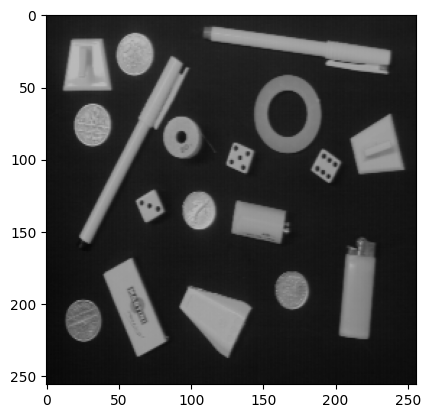

In [4]:
plt.imshow(objects_image, cmap='gray', vmin=0, vmax=255)
plt.show()

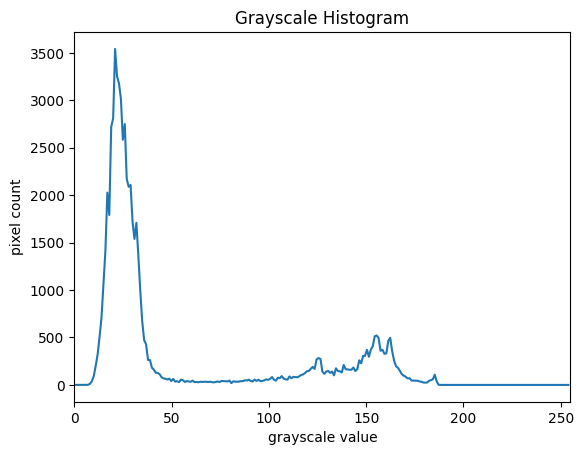

In [5]:
show_histogram(objects_image)

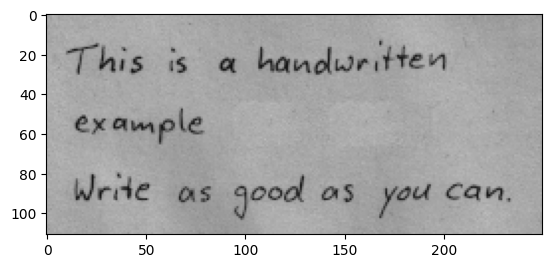

In [6]:
plt.imshow(text_image, cmap='gray', vmin=0, vmax=255)
plt.show()

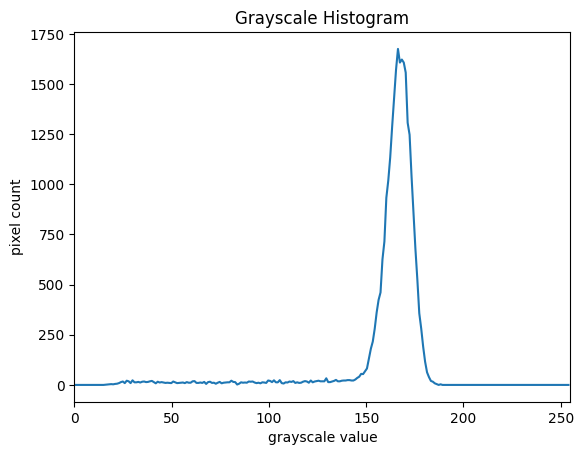

In [7]:
show_histogram(text_image)

## Umbralización Global - Objects

In [8]:
thres_value, thres_image = cv2.threshold(objects_image, 50, 255,cv2.THRESH_BINARY)

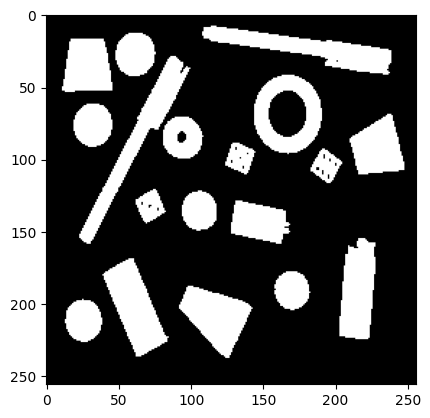

In [9]:
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

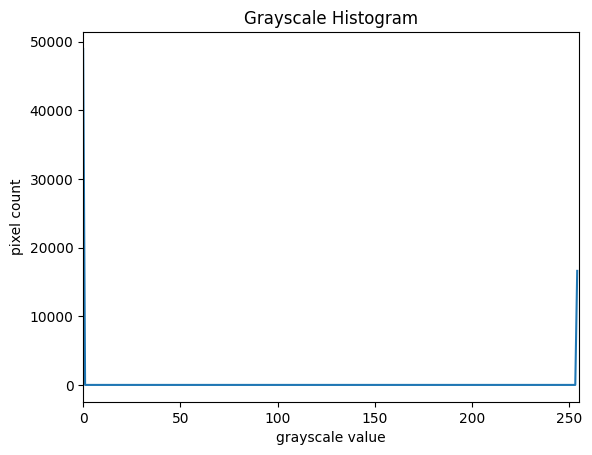

In [10]:
show_histogram(thres_image)

## Umbralización Otsu - Objects

In [11]:
thres_value, thres_image = cv2.threshold(objects_image, 0, 100, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

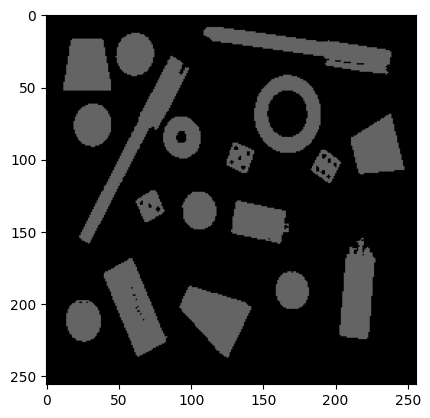

In [12]:
plt.imshow(thres_image, cmap='gray', vmin=0, vmax=255)

## Adición de ruido - Varianza 0.05

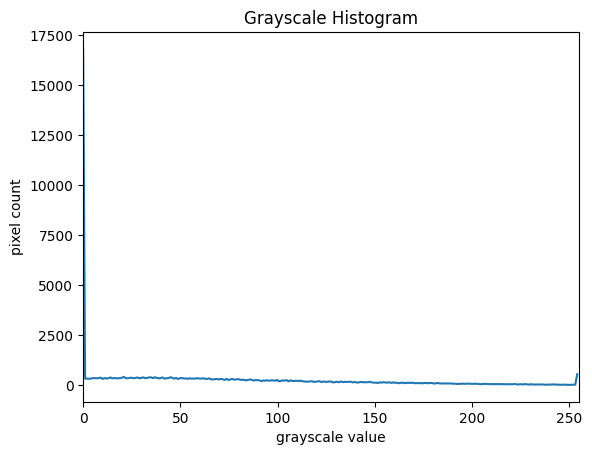

In [28]:
noised_image_var_1 = random_noise(objects_image, mode='gaussian', mean=0, var=0.05)
show_histogram(noised_image_var_1*255)

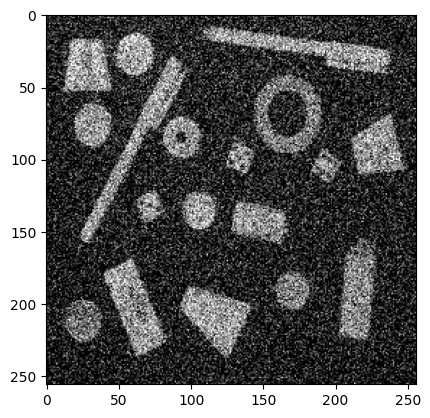

In [14]:
plt.imshow(noised_image_var_1*255, cmap='gray', vmin=0, vmax=255)

## Adición de ruido - Varianza 0.001 

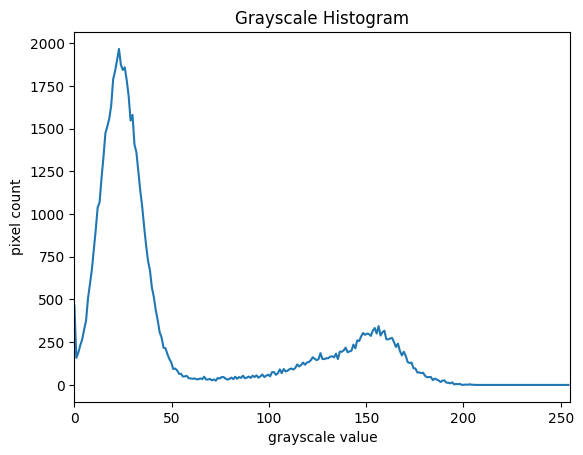

In [27]:
noised_image_var_2 = random_noise(objects_image, mode='gaussian', mean=0, var=0.001)
show_histogram(noised_image_var_2*255)

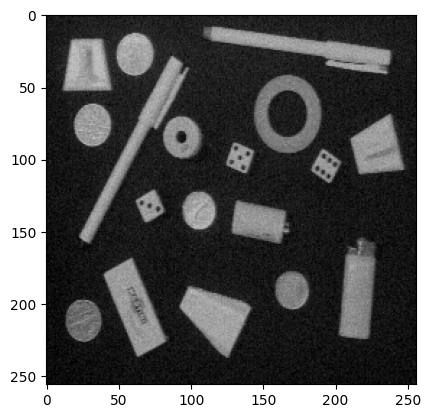

In [16]:
plt.imshow(noised_image_var_2*255, cmap='gray', vmin=0, vmax=255)

### *¿Qué sucede? ¿Por qué sucede esto?*

// Respuesta

## Umbralizaciones sobre las imagenes generadas con ruido

### Umbralizaciones globales

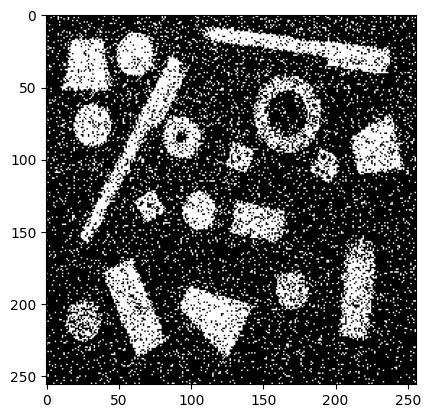

In [30]:
thres_value_1, thres_image_1 = cv2.threshold(noised_image_var_1*255, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image_1, cmap='gray', vmin=0, vmax=255)

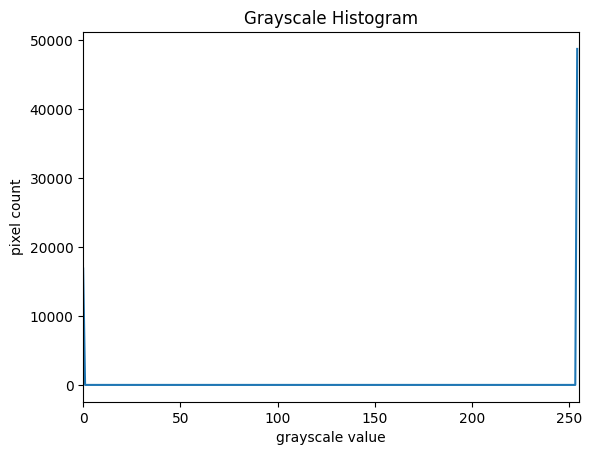

In [18]:
show_histogram(thres_image_1)

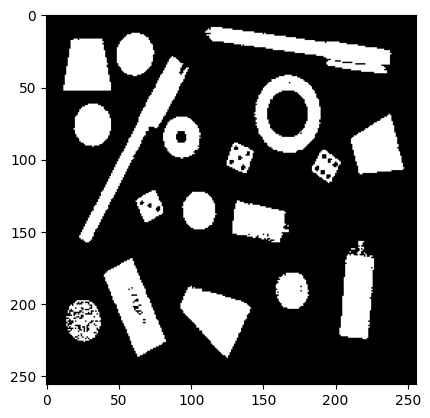

In [26]:
thres_value_2, thres_image_2 = cv2.threshold(noised_image_var_2*255, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image_2, cmap='gray', vmin=0, vmax=255)

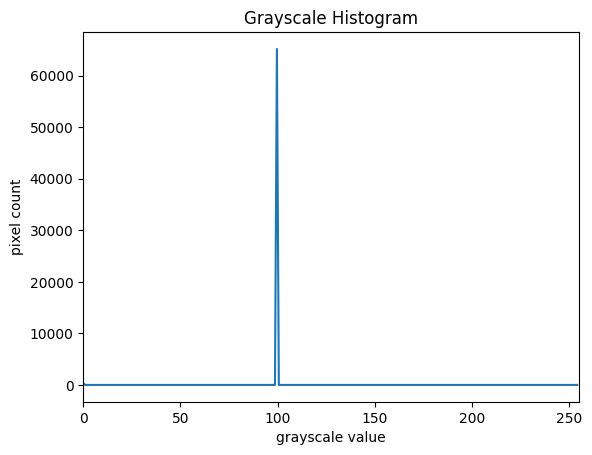

In [22]:
show_histogram(thres_image_2)